In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cart
import cartopy.io.img_tiles as cimgt
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import calendar

In [3]:
ds = r'C:\Users\bendo\OneDrive - George Mason University - O365 Production\Class\Clim680\data\sst.mnmean.nc'
ds = xr.open_dataset(ds)
ds

<xarray.Dataset> Size: 120MB
Dimensions:    (lat: 180, lon: 360, time: 461, nbnds: 2)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2020-04-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 119MB ...
    time_bnds  (time, nbnds) datetime64[ns] 7kB ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [10]:
# ds_monthly = ds.resample(sst).mean()
ds_month = ds.groupby('time.month').mean()
ds_month

<xarray.Dataset> Size: 3MB
Dimensions:  (month: 12, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lat, lon) float32 3MB -1.79 -1.79 -1.79 ... -1.79 -1.79
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [11]:
max_temp = ds_month['sst'].max()
print(max_temp)

<xarray.DataArray 'sst' ()> Size: 4B
array(33.78816, dtype=float32)


In [12]:
min_temp = ds_month['sst'].min()
print(min_temp)

<xarray.DataArray 'sst' ()> Size: 4B
array(-1.7900007, dtype=float32)


Text(0.5, 0.98, 'Mean Sea Surface Temperatura')

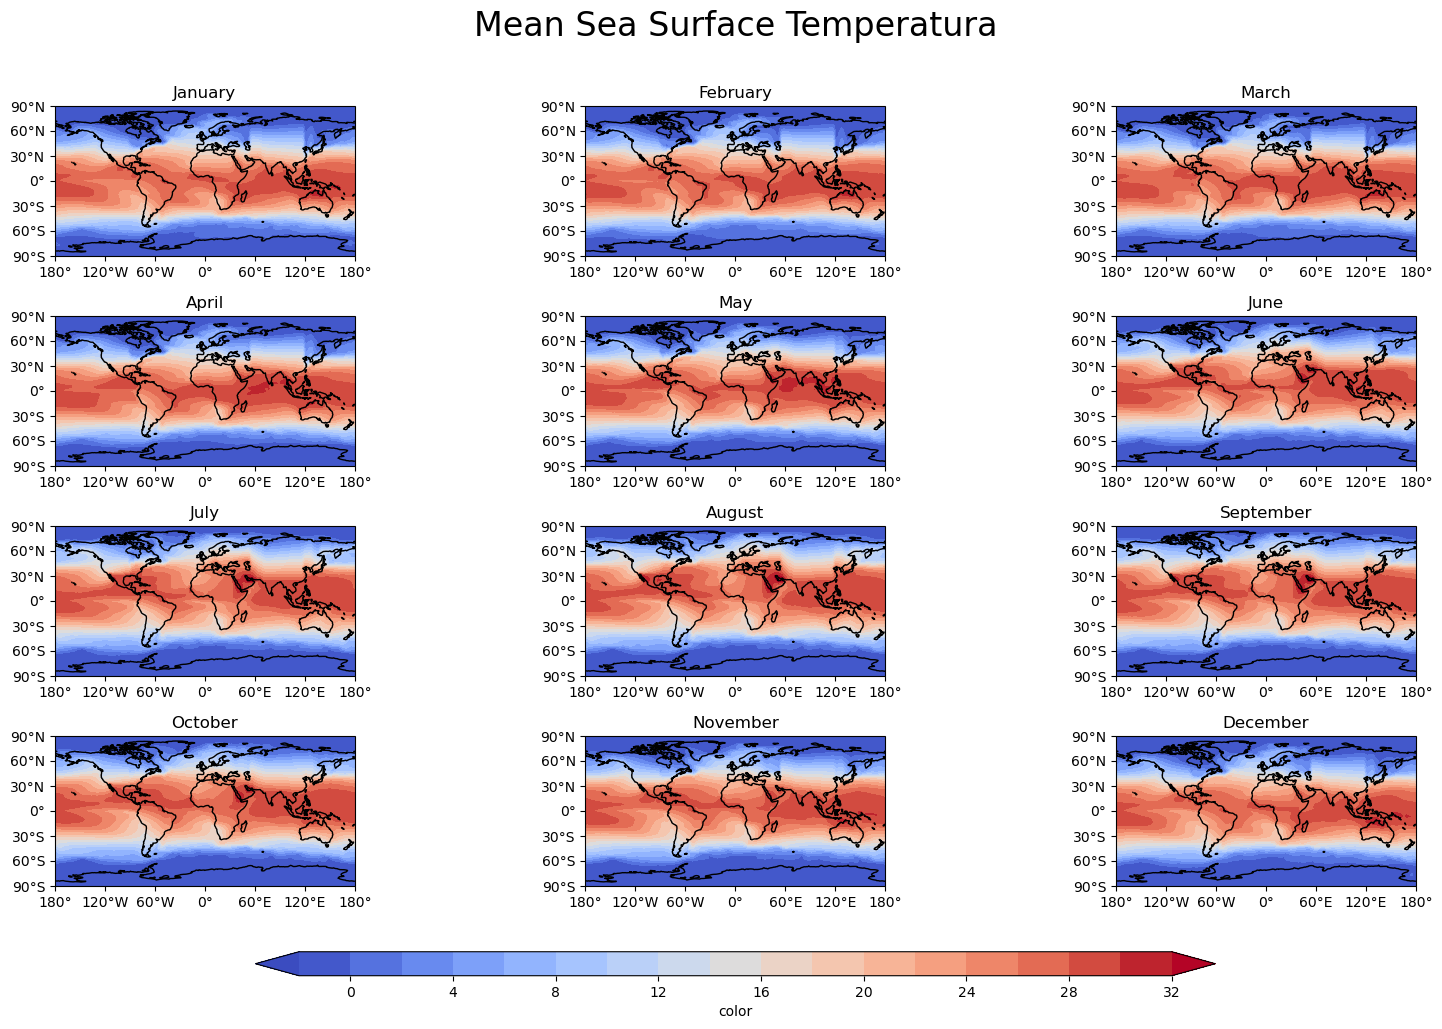

In [27]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=4, ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(16, 12))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs = axs.flatten()

clevs = np.arange(-2, 34, 2)  # Contour levels

# Loop over all of the months and plot
for i, month in enumerate(ds_month['month']):

    # Select the month
    data = ds_month['sst'].sel(month=month)

    # Add the cyclic point
    data, lons = add_cyclic_point(data, coord=ds_month['lon'])

    # Contour plot
    cs = axs[i].contourf(lons, ds_month['lat'], data, clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='coolwarm', extend='both')

    # Longitude labels
    axs[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the month
    axs[i].set_title(calendar.month_name[int(month)])

    # Draw the coastlines for each subplot
    axs[i].coastlines()

    
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.4, hspace=0.4)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='color')

# Add a big title at the top
plt.suptitle('Mean Sea Surface Temperatura', fontsize=24)

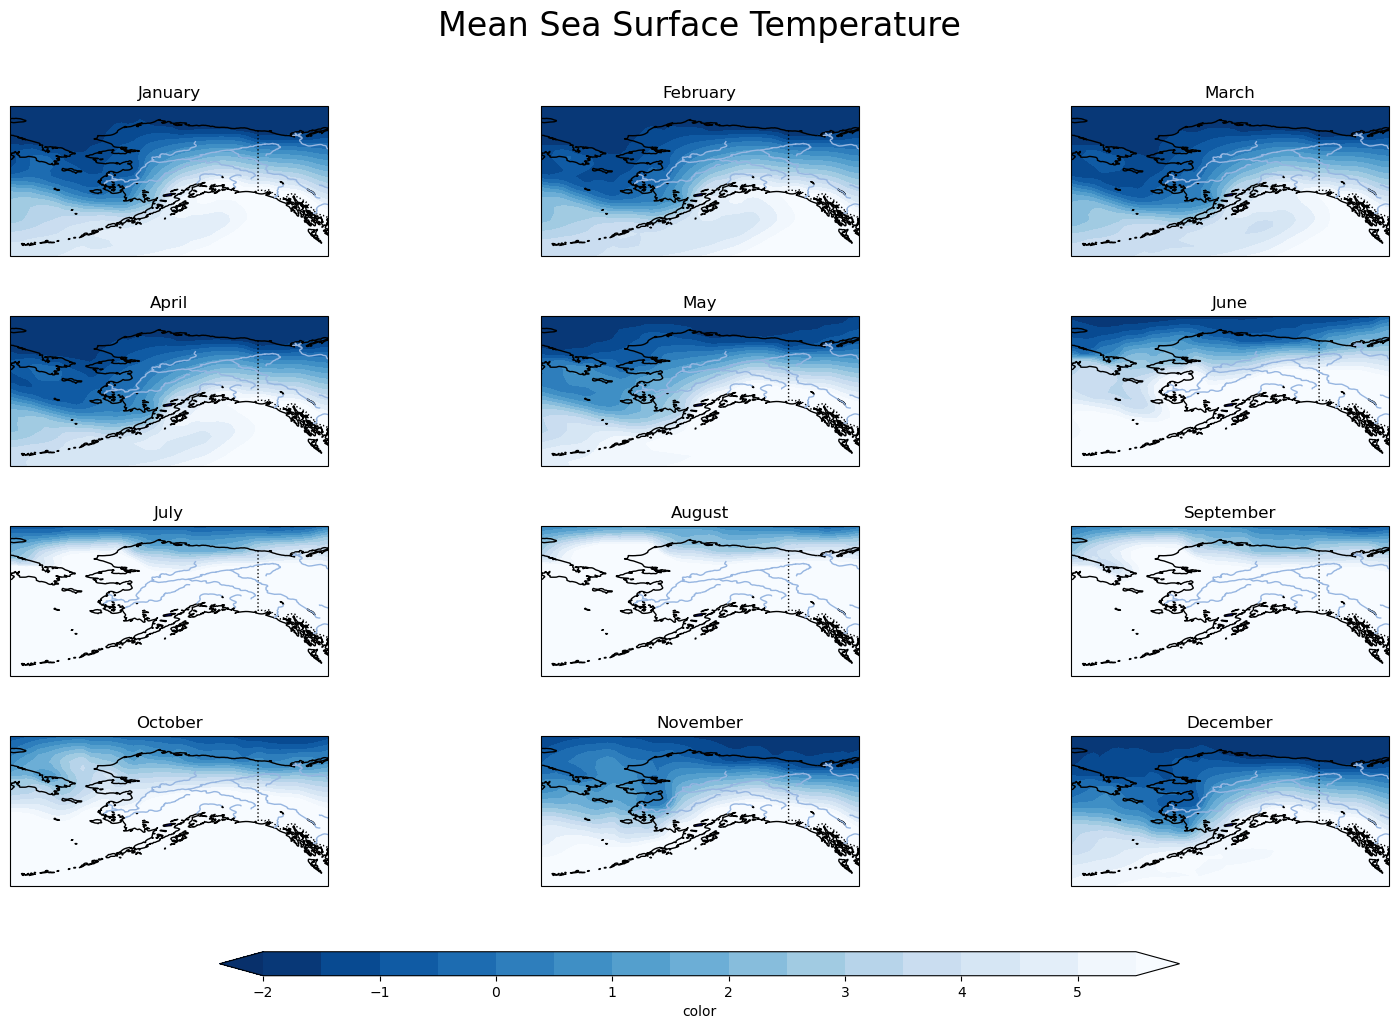

In [40]:
# Define the figure and each axis for the 3 rows and 4 columns
# make the central longitude at Alaska

# Change the map projection to Albers Equal Area for better showing Alaska state
projection = ccrs.PlateCarree(central_longitude=-150)

# make a zoom to Alaska state
extent = [-180, -130, 50, 72]

# Define the figure and each axis for the 3 rows and 4 columns
fig, axs = plt.subplots(nrows=4, ncols=3,
                        subplot_kw={'projection': projection},
                        figsize=(16, 12))

# axs is a 2 dimensional array of `GeoAxes`.
# We will flatten it into a 1-D array
axs = axs.flatten()

clevs = np.arange(-2, 6, 0.5)  # Contour levels

# Loop over all of the months and plot

for i, month in enumerate(ds_month['month']):
    # Select the month
    data = ds_month['sst'].sel(month=month)

    # Add the cyclic point
    data, lons = add_cyclic_point(data, coord=ds_month['lon'])

    # Contour plot
    cs = axs[i].contourf(lons, ds_month['lat'], data, clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='Blues_r', extend='both')

    # set the map extent
    axs[i].set_extent(extent)

    # Title each subplot with the name of the month
    axs[i].set_title(calendar.month_name[int(month)])

    # Draw the coastlines for each subplot
    axs[i].coastlines()

    axs[i].add_feature(cart.BORDERS, linestyle=':') 
    axs[i].add_feature(cart.LAKES, edgecolor='black', facecolor='blue')
    axs[i].add_feature(cart.RIVERS)

# Adjust the location of the subplots
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.4, hspace=0.4)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='color')

#add border line


# Add a big title at the top
plt.suptitle('Mean Sea Surface Temperature', fontsize=24)

plt.show()